In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import osmnx as ox
import geopandas as gpd
from scipy.stats import f_oneway
import contextily as ctx
from shapely.geometry import box
import folium
from pysal.explore import esda
from pysal.lib import weights
%matplotlib inline

/home/geonode/anaconda3/envs/python-gis/lib/python3.10/site-packages/spaghetti/network.py:39: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


In [35]:
df = pd.read_csv('./data/eda_data.csv', sep = ';')

In [36]:
df.head(10)

name  mosstat_po          gns  fclass  total_area  \
0            Академический район      110161    953696.72       1     6657.60   
1             Алексеевский район       79193    960466.41       1     2766.27   
2             Алтуфьевский район       57361    574633.85       1      636.90   
3             Бабушкинский район       88092    623529.71       1     2682.42   
4                Басманный район      110928   1865941.71       1     5586.00   
5          Бескудниковский район       78567    910504.22       1     1445.40   
6    Богородский городской округ      211528  14458967.63       1  1554974.55   
7                Бутырский район       70957   1010072.39       1     2188.05   
8               Войковский район       70499    718281.11       1     2403.83   
9  Волоколамский городской округ       38169   3307198.70       1   742423.50   

   oblast_count  avt_count  
0             2        584  
1             0        533  
2             0        193  
3             1        543  
4             0        665  
5             0        438  
6          1917          1  
7             1        435  
8             1        451  
9           441          1

In [37]:
df.tail()

name  mosstat_po         gns  fclass  total_area  \
201  Тимирязевский район       82510   608214.27       1     7220.37   
202   Тропарёво-Никулино      122663  2092552.13       1     9749.22   
203    Хорошёвский район       70970  1083707.44       1     6847.43   
204   Южнопортовый район       74508  1105992.19       1     2253.01   
205    Ярославский район       97502  9943692.40       1     5796.30   

     oblast_count  avt_count  
201             1        687  
202             1        862  
203             0        799  
204             1        493  
205             0        695

In [38]:
df.sample(3)

name  mosstat_po          gns  fclass  total_area  \
86   поселение Десёновское       24839  11214339.77       1   341785.50   
180          район Ховрино       87711    621375.24       1     2635.00   
62       Даниловский район       94232   1087122.34       1    42934.32   

     oblast_count  avt_count  
86             15        430  
180             0        500  
62              3       1144

In [39]:
df.shape

(206, 7)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          206 non-null    object 
 1   mosstat_po    206 non-null    int64  
 2   gns           206 non-null    float64
 3   fclass        206 non-null    int64  
 4   total_area    206 non-null    float64
 5   oblast_count  206 non-null    int64  
 6   avt_count     206 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 11.4+ KB


**Основные числовые характеристики**

In [41]:
df.describe()

mosstat_po           gns  fclass    total_area  oblast_count  \
count     206.000000  2.060000e+02   206.0  2.060000e+02    206.000000   
mean    99322.961165  4.196207e+06     1.0  1.766731e+07    254.165049   
std     74453.889733  4.767083e+06     0.0  1.745676e+08    572.310424   
min      1768.000000  3.587263e+04     1.0  5.930000e+00      0.000000   
25%     48513.750000  8.561520e+05     1.0  3.284165e+03      1.000000   
50%     87363.000000  1.327413e+06     1.0  8.856380e+03      2.000000   
75%    128659.500000  7.916858e+06     1.0  2.299425e+05    137.000000   
max    529556.000000  1.659909e+07     1.0  2.483064e+09   2934.000000   

         avt_count  
count   206.000000  
mean    413.106796  
std     345.297946  
min       0.000000  
25%      34.250000  
50%     428.000000  
75%     645.750000  
max    1338.000000

In [42]:
df.describe(include='object')

name
count                   206
unique                  206
top     Академический район
freq                      1

In [43]:
df.describe(include='all')

name     mosstat_po           gns  fclass  \
count                   206     206.000000  2.060000e+02   206.0   
unique                  206            NaN           NaN     NaN   
top     Академический район            NaN           NaN     NaN   
freq                      1            NaN           NaN     NaN   
mean                    NaN   99322.961165  4.196207e+06     1.0   
std                     NaN   74453.889733  4.767083e+06     0.0   
min                     NaN    1768.000000  3.587263e+04     1.0   
25%                     NaN   48513.750000  8.561520e+05     1.0   
50%                     NaN   87363.000000  1.327413e+06     1.0   
75%                     NaN  128659.500000  7.916858e+06     1.0   
max                     NaN  529556.000000  1.659909e+07     1.0   

          total_area  oblast_count    avt_count  
count   2.060000e+02    206.000000   206.000000  
unique           NaN           NaN          NaN  
top              NaN           NaN          NaN  
freq             NaN           NaN          NaN  
mean    1.766731e+07    254.165049   413.106796  
std     1.745676e+08    572.310424   345.297946  
min     5.930000e+00      0.000000     0.000000  
25%     3.284165e+03      1.000000    34.250000  
50%     8.856380e+03      2.000000   428.000000  
75%     2.299425e+05    137.000000   645.750000  
max     2.483064e+09   2934.000000  1338.000000

In [44]:
df.duplicated().sum()

0

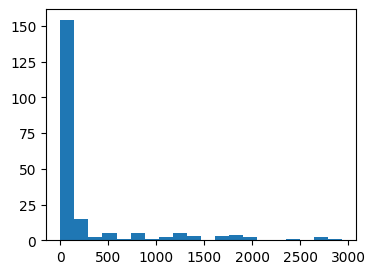

In [45]:
plt.figure(figsize=(4,3))

plt.hist(df.oblast_count, bins=20);

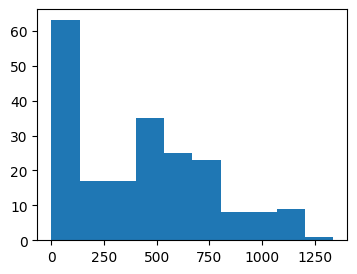

In [46]:
plt.figure(figsize=(4,3))

plt.hist(df.avt_count);

In [47]:
df.avt_count.min(), df.oblast_count.max()

(0, 2934)

Посмотрим как население влияет на ДТП

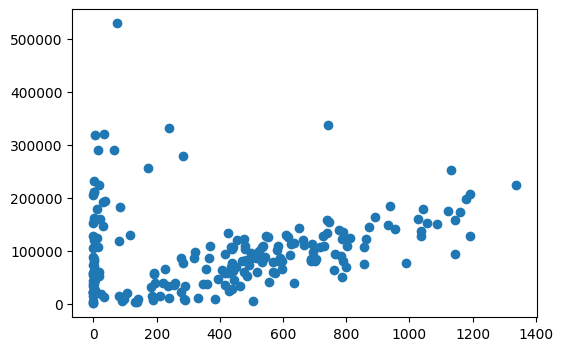

In [48]:
plt.figure(figsize=(6,4))

plt.scatter(df.avt_count, df.mosstat_po);

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          206 non-null    object 
 1   mosstat_po    206 non-null    int64  
 2   gns           206 non-null    float64
 3   fclass        206 non-null    int64  
 4   total_area    206 non-null    float64
 5   oblast_count  206 non-null    int64  
 6   avt_count     206 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 11.4+ KB


Уровень автомобилизации **331** автомобиль на 1000 человек

In [55]:
df['level_auto'] = (df['mosstat_po']/1000)*331

In [56]:
df_copy = df.copy()

profile_report = ProfileReport(df_copy, title='Pandas Profiling Report')

In [57]:
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Корреляция

**Корреляция Пирсона**

pearson.svg

Корреляция Пирсона - это мера линейной взаимосвязи двух числовых столбцов.

* $r$	=	correlation coefficient
* $x_{i}$	=	values of the x-variable in a sample
* $\bar{x}$	=	mean of the values of the x-variable
* $y_{i}$	=	values of the y-variable in a sample
* $\bar{y}$	=	mean of the values of the y-variable

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          206 non-null    object 
 1   mosstat_po    206 non-null    int64  
 2   gns           206 non-null    float64
 3   fclass        206 non-null    int64  
 4   total_area    206 non-null    float64
 5   oblast_count  206 non-null    int64  
 6   avt_count     206 non-null    int64  
 7   level_auto    206 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 13.0+ KB


<AxesSubplot: >

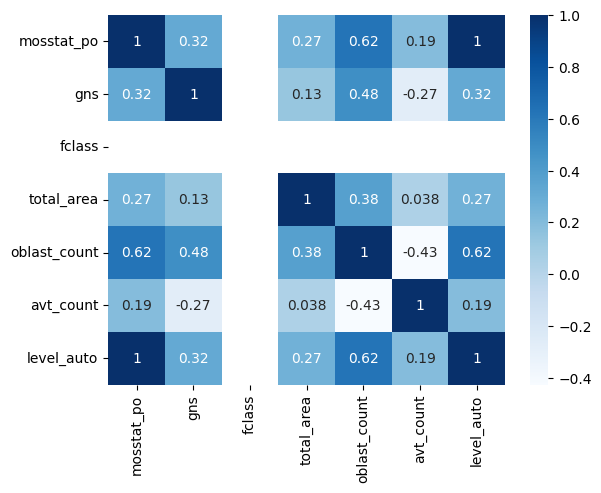

In [62]:
corr = df.drop(['name'], axis=1).corr() # матрица корреляций
sns.heatmap(corr, cmap="Blues", annot=True)

**Корреляция Спирмена**

Коэффициент корреляции Спирмена основан на ранжировании значений переменных и измеряет степень монотонной связи между ними.

Значение коэффициента корреляции Спирмена лежит в диапазоне от -1 до 1. Значение -1 означает полную отрицательную связь (чем больше одна переменная, тем меньше другая), значение 1 означает положительную связь (чем больше одна переменная, тем больше другая), а значение 0 означает отсутствие связи между переменными.

Можно использовать для порядковых переменных!

spearman.svg

* $\rho$	=	Spearman's rank correlation coefficient
* $d_{i}$	=	difference between the two ranks of each observation
* $n$	=	number of observations

[Пример расчета коэффициента корреляции Спирмена](https://statpsy.ru/spearman/primer-raschet-spearman/)

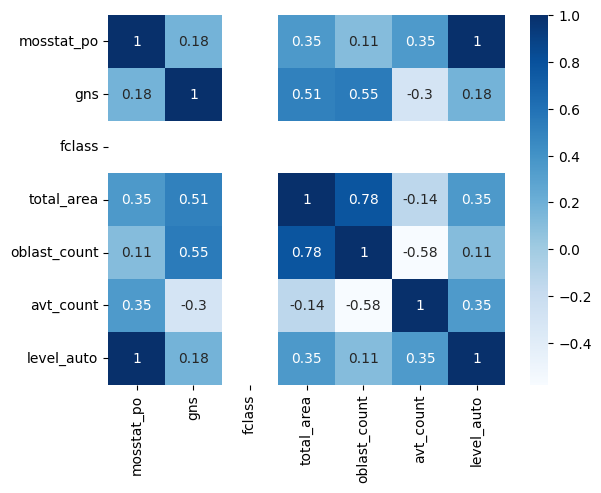

In [64]:
corr = df.drop(['name'], axis=1).corr(method='spearman')

sns.heatmap(corr, cmap="Blues", annot=True);

ANOVA

Для измерения связи между Числовым - Категориальным признаком

ANOVA (англ. Analysis of Variance) - это статистический метод, используемый для сравнения средних значений между тремя и более группами. ANOVA анализирует различия между средними значениями внутри групп и между группами, чтобы определить, есть ли статистически значимые различия между ними.

ANOVA основан на предположении, что переменная, которая анализируется, является нормально распределенной в каждой группе, и что дисперсия внутри групп равномерна. В результате, ANOVA проверяет, насколько различны средние значения между группами по сравнению со случайной вариацией внутри групп.

ANOVA производит F-тест, который сравнивает дисперсию между группами с дисперсией внутри групп. Если различия между группами значительны по сравнению со случайной вариацией внутри групп, то F-тест покажет статистически значимый результат, указывающий на наличие различий между группами.

In [66]:
df['name'].unique()

array(['Академический район', 'Алексеевский район', 'Алтуфьевский район',
       'Бабушкинский район', 'Басманный район', 'Бескудниковский район',
       'Богородский городской округ', 'Бутырский район',
       'Войковский район', 'Волоколамский городской округ', 'Восточный',
       'Гагаринский район', 'Головинский район',
       'городской округ Балашиха', 'городской округ Бронницы',
       'городской округ Власиха', 'городской округ Воскресенск',
       'городской округ Восход', 'городской округ Дзержинский',
       'городской округ Долгопрудный', 'городской округ Домодедово',
       'городской округ Дубна', 'городской округ Егорьевск',
       'городской округ Жуковский', 'городской округ Зарайск',
       'городской округ Звёздный городок', 'городской округ Истра',
       'городской округ Кашира', 'городской округ Клин',
       'городской округ Коломна', 'городской округ Королёв',
       'городской округ Котельники', 'городской округ Красногорск',
       'городской округ Краснознаме

In [74]:
moscow_districts = ['Академический район', 'Алексеевский район', 'Алтуфьевский район',
       'Бабушкинский район', 'Басманный район', 'Бескудниковский район',
       'Богородский городской округ', 'Бутырский район',
       'Войковский район',  'Восточный',
       'Гагаринский район', 'Головинский район',
       'городской округ Троицк', 'Даниловский район', 'Дмитровский район',
       'Донской район', 'Красносельский район',
       'Ленинский городской округ', 'Ломоносовский район',
       'Лосиноостровский район', 'Мещанский район', 'Можайский район',
       'Молжаниновский район', 'Нагорный район', 'Нижегородский район',
       'Ново-Переделкино', 'Обручевский район',
       'Останкинский район', 'поселение "Мосрентген"',
       'поселение Внуковское', 'поселение Вороновское',
       'поселение Воскресенское', 'поселение Десёновское',
       'поселение Киевский', 'поселение Клёновское',
       'поселение Кокошкино', 'поселение Краснопахорское',
       'поселение Марушкинское', 'поселение Михайлово-Ярцевское',
       'поселение Московский', 'поселение Новофёдоровское',
       'поселение Первомайское', 'поселение Роговское',
       'поселение Рязановское', 'поселение Сосенское',
       'поселение Филимонковское', 'поселение Щаповское',
       'Пресненский район','район Арбат',
       'район Аэропорт', 'район Беговой', 'район Бибирево',
       'район Бирюлёво Восточное', 'район Бирюлёво Западное',
       'район Богородское', 'район Братеево', 'район Вешняки',
       'район Внуково', 'район Восточное Дегунино',
       'район Восточное Измайлово', 'район Выхино-Жулебино',
       'район Гольяново', 'район Дорогомилово', 'район Замоскворечье',
       'район Западное Дегунино', 'район Зюзино', 'район Зябликово',
       'район Ивановское', 'район Измайлово', 'район Капотня',
       'район Коньково', 'район Коптево', 'район Косино-Ухтомский',
       'район Котловка', 'район Крылатское', 'район Крюково',
       'район Кузьминки', 'район Кунцево', 'район Куркино',
       'район Левобережный', 'район Лефортово', 'район Лианозово',
       'район Люблино', 'район Марфино', 'район Марьина Роща',
       'район Марьино', 'район Матушкино', 'район Метрогородок',
       'район Митино', 'район Москворечье-Сабурово',
       'район Нагатино-Садовники', 'район Нагатинский Затон',
       'район Некрасовка', 'район Новогиреево', 'район Новокосино',
       'район Орехово-Борисово Северное', 'район Орехово-Борисово Южное',
       'район Отрадное', 'район Очаково-Матвеевское', 'район Перово',
       'район Печатники', 'район Покровское-Стрешнево',
       'район Преображенское', 'район Проспект Вернадского',
       'район Раменки', 'район Ростокино', 'район Савёлки',
       'район Свиблово', 'район Северное Бутово',
       'район Северное Измайлово', 'район Северное Медведково',
       'район Северное Тушино', 'район Северный', 'район Силино',
       'район Сокол', 'район Соколиная Гора', 'район Сокольники',
       'район Солнцево', 'район Старое Крюково', 'район Строгино',
       'район Текстильщики', 'район Тёплый Стан', 'район Филёвский Парк',
       'район Фили-Давыдково', 'район Хамовники', 'район Ховрино',
       'район Хорошёво-Мнёвники', 'район Царицыно', 'район Черёмушки',
       'район Чертаново Северное', 'район Чертаново Центральное',
       'район Чертаново Южное', 'район Щукино', 'район Южное Бутово',
       'район Южное Медведково', 'район Южное Тушино', 'район Якиманка',
       'район Ясенево', 'Рязанский район', 'Савёловский район', 'Таганский район', 'Тверской район',
       'Тимирязевский район', 'Тропарёво-Никулино', 'Хорошёвский район',
       'Южнопортовый район']

In [76]:
df['state'] = np.where(df['name'].isin(moscow_districts), 'Москва', 'Московская Область')

In [77]:
df.head(20)

name  mosstat_po          gns  fclass  \
0             Академический район      110161    953696.72       1   
1              Алексеевский район       79193    960466.41       1   
2              Алтуфьевский район       57361    574633.85       1   
3              Бабушкинский район       88092    623529.71       1   
4                 Басманный район      110928   1865941.71       1   
5           Бескудниковский район       78567    910504.22       1   
6     Богородский городской округ      211528  14458967.63       1   
7                 Бутырский район       70957   1010072.39       1   
8                Войковский район       70499    718281.11       1   
9   Волоколамский городской округ       38169   3307198.70       1   
10                      Восточный       13503  10457148.48       1   
11              Гагаринский район       81420   1890869.40       1   
12              Головинский район      102722   1326246.00       1   
13       городской округ Балашиха      529556   8250298.52       1   
14       городской округ Бронницы       21384    853757.95       1   
15        городской округ Власиха       27459  16113432.09       1   
16    городской округ Воскресенск      152858  16599086.43       1   
17         городской округ Восход        1768     35872.63       1   
18    городской округ Дзержинский       52630   1477799.63       1   
19   городской округ Долгопрудный      120301   9943692.40       1   

     total_area  oblast_count  avt_count  level_auto               state  
0       6657.60             2        584   36463.291              Москва  
1       2766.27             0        533   26212.883              Москва  
2        636.90             0        193   18986.491              Москва  
3       2682.42             1        543   29158.452              Москва  
4       5586.00             0        665   36717.168              Москва  
5       1445.40             0        438   26005.677              Москва  
6    1554974.55          1917          1   70015.768              Москва  
7       2188.05             1        435   23486.767              Москва  
8       2403.83             1        451   23335.169              Москва  
9     742423.50           441          1   12633.939  Московская Область  
10       205.26             2         33    4469.493              Москва  
11      3896.10             0        702   26950.020              Москва  
12      5133.00             1        580   34000.982              Москва  
13  34449069.00          1882         75  175283.036  Московская Область  
14      4919.52           222          0    7078.104  Московская Область  
15      1584.00            60          6    9088.929  Московская Область  
16    551071.62           678          0   50595.998  Московская Область  
17        48.69             3          0     585.208  Московская Область  
18     11954.80           190          4   17420.530  Московская Область  
19     18689.85           205          3   39819.631  Московская Область

In [84]:
CategoryGroupLists = df.groupby('state')['level_auto'].apply(list)

In [86]:
CategoryGroupLists 

state
Москва                [36463.291, 26212.882999999998, 18986.49099999...
Московская Область    [12633.938999999998, 175283.03600000002, 7078....
Name: level_auto, dtype: object

In [85]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value >= 0.05

AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.0011851692501837245


In [87]:
if AnovaResults[1] >= 0.05:
    print('Значения не имеют корелации')
else:
    print('Значения имеют кореляцию')

Значения имеют кореляцию


In [90]:
Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)


/home/geonode/anaconda3/envs/python-gis/lib/python3.10/site-packages/scipy/stats/stats.py:3629: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(F_onewayBadInputSizesWarning(msg))
/home/geonode/anaconda3/envs/python-gis/lib/python3.10/site-packages/scipy/stats/stats.py:3629: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(F_onewayBadInputSizesWarning(msg))
/home/geonode/anaconda3/envs/python-gis/lib/python3.10/site-packages/scipy/stats/stats.py:3629: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(F_onewayBadInputSizesWarning(msg))
/home/geonode/anaconda3/envs/python-gis/lib/python3.10/site-packages/scipy/stats/stats.py:3629: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_on

In [94]:
AnovaRes

Category     Numerical Is correlated
0      name    mosstat_po           Yes
1      name           gns           Yes
2      name        fclass           Yes
3      name    total_area           Yes
4      name  oblast_count           Yes
5      name     avt_count           Yes
6      name    level_auto           Yes
7     state    mosstat_po           Yes
8     state           gns           Yes
9     state        fclass           Yes
10    state    total_area           Yes
11    state  oblast_count           Yes
12    state     avt_count           Yes
13    state    level_auto           Yes

In [96]:
gdf = gpd.read_file('./data/mos_mo_poi.gpkg')

<AxesSubplot: >

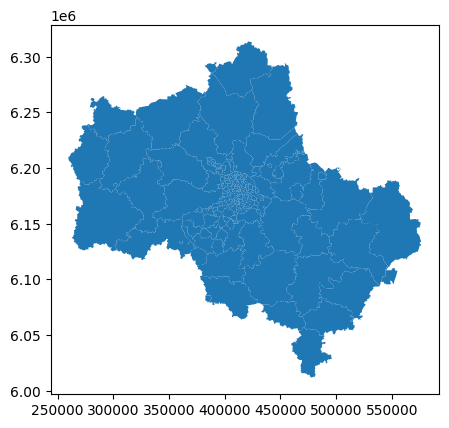

In [97]:
gdf.plot()

In [98]:
gdf.head()

id                                name  mosstat_po    счр fclass  \
0   1  Сергиево-Посадский городской округ      206676  50201   1587   
1   2          Талдомский городской округ       46250   6074    521   
2   3              городской округ Мытищи      290495  68374   2079   
3   4         Дмитровский городской округ      162029  36686   1724   
4   5       Волоколамский городской округ       38169   8957    578   

           gns     area                                           geometry  
0  10449243.96  2027.31  MULTIPOLYGON (((453839.274 6294650.326, 455502...  
1   3035467.03  1428.14  MULTIPOLYGON (((392923.738 6290411.716, 393170...  
2   9943692.40   431.28  MULTIPOLYGON (((402904.412 6205967.079, 402903...  
3  10071050.05  2181.23  MULTIPOLYGON (((383140.400 6266976.485, 383246...  
4   3307198.70  1683.50  MULTIPOLYGON (((329276.762 6215802.057, 329340...

In [99]:
df.head()

name  mosstat_po         gns  fclass  total_area  \
0  Академический район      110161   953696.72       1     6657.60   
1   Алексеевский район       79193   960466.41       1     2766.27   
2   Алтуфьевский район       57361   574633.85       1      636.90   
3   Бабушкинский район       88092   623529.71       1     2682.42   
4      Басманный район      110928  1865941.71       1     5586.00   

   oblast_count  avt_count  level_auto   state  
0             2        584   36463.291  Москва  
1             0        533   26212.883  Москва  
2             0        193   18986.491  Москва  
3             1        543   29158.452  Москва  
4             0        665   36717.168  Москва

In [165]:
df = df.rename(columns={"oblast_count": "car_accidents_mo", "avt_count": "car_accidents_moscow"})

In [166]:
# Объединение данных
merged_gdf = gdf.merge(df, on='name')

In [167]:
merged_gdf

id                                name  mosstat_po_x     счр fclass_x  \
0      1  Сергиево-Посадский городской округ        206676   50201     1587   
1      2          Талдомский городской округ         46250    6074      521   
2      3              городской округ Мытищи        290495   68374     2079   
3      4         Дмитровский городской округ        162029   36686     1724   
4      5       Волоколамский городской округ         38169    8957      578   
..   ...                                 ...           ...     ...      ...   
201  202                     район Гольяново        161126   10907      705   
202  203                     район Измайлово        107379    4147     1105   
203  204                    район Ивановское        125737    8831      507   
204  205                     Басманный район        110928  174649     3351   
205  206                           Восточный         13503     992       45   

           gns_x     area                                           geometry  \
0    10449243.96  2027.31  MULTIPOLYGON (((453839.274 6294650.326, 455502...   
1     3035467.03  1428.14  MULTIPOLYGON (((392923.738 6290411.716, 393170...   
2     9943692.40   431.28  MULTIPOLYGON (((402904.412 6205967.079, 402903...   
3    10071050.05  2181.23  MULTIPOLYGON (((383140.400 6266976.485, 383246...   
4     3307198.70  1683.50  MULTIPOLYGON (((329276.762 6215802.057, 329340...   
..           ...      ...                                                ...   
201   1055485.39    14.39  MULTIPOLYGON (((421697.926 6184768.018, 421474...   
202    672649.91    15.06  MULTIPOLYGON (((421288.426 6181200.132, 421282...   
203    720791.33    10.14  MULTIPOLYGON (((427164.900 6183137.609, 427316...   
204   1865941.71     8.40  MULTIPOLYGON (((416267.839 6179400.671, 416260...   
205  10457148.48     3.11  MULTIPOLYGON (((427641.083 6185933.052, 428120...   

     mosstat_po_y        gns_y  fclass_y   total_area  car_accidents_mo  \
0          206676  10449243.96         1   3349116.12              1652   
1           46250   3035467.03         1   4335833.04               506   
2          290495   9943692.40         1  35125599.60              1253   
3          162029  10071050.05         1  11248603.11              1719   
4           38169   3307198.70         1    742423.50               441   
..            ...          ...       ...          ...               ...   
201        161126   1055485.39         1     14764.14                 1   
202        107379    672649.91         1     21626.16                 2   
203        125737    720791.33         1      8223.54                 1   
204        110928   1865941.71         1      5586.00                 0   
205         13503  10457148.48         1       205.26                 2   

     car_accidents_moscow  level_auto               state  
0                       0   68409.756  Московская Область  
1                       6   15308.750  Московская Область  
2                      65   96153.845  Московская Область  
3                       3   53631.599  Московская Область  
4                       1   12633.939  Московская Область  
..                    ...         ...                 ...  
201                  1026   53332.706              Москва  
202                   718   35542.449              Москва  
203                   811   41618.947              Москва  
204                   665   36717.168              Москва  
205                    33    4469.493              Москва  

[206 rows x 16 columns]

In [168]:
geo_df = merged_gdf.drop(['mosstat_po_y', 'gns_y', 'fclass_y', 'total_area'], axis=1)

In [169]:
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    206 non-null    int64   
 1   name                  206 non-null    object  
 2   mosstat_po_x          206 non-null    int64   
 3   счр                   206 non-null    int64   
 4   fclass_x              206 non-null    object  
 5   gns_x                 206 non-null    float64 
 6   area                  206 non-null    float64 
 7   geometry              206 non-null    geometry
 8   car_accidents_mo      206 non-null    int64   
 9   car_accidents_moscow  206 non-null    int64   
 10  level_auto            206 non-null    float64 
 11  state                 206 non-null    object  
dtypes: float64(3), geometry(1), int64(5), object(3)
memory usage: 19.4+ KB


In [115]:
geo_df = geo_df.rename(columns={"mosstat_po_x": "populations",'счр':'populations_mean', "fclass_x": "poi_dif_zones", "gns_x":'gns'})

In [170]:
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    206 non-null    int64   
 1   name                  206 non-null    object  
 2   mosstat_po_x          206 non-null    int64   
 3   счр                   206 non-null    int64   
 4   fclass_x              206 non-null    object  
 5   gns_x                 206 non-null    float64 
 6   area                  206 non-null    float64 
 7   geometry              206 non-null    geometry
 8   car_accidents_mo      206 non-null    int64   
 9   car_accidents_moscow  206 non-null    int64   
 10  level_auto            206 non-null    float64 
 11  state                 206 non-null    object  
dtypes: float64(3), geometry(1), int64(5), object(3)
memory usage: 19.4+ KB


In [171]:
geo_df['densty_auto'] = geo_df['level_auto']/geo_df['area']

In [172]:
geo_df.crs

<Derived Projected CRS: EPSG:32637>
Name: WGS 84 / UTM zone 37N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 36°E and 42°E, northern hemisphere between equator and 84°N, onshore and offshore. Djibouti. Egypt. Eritrea. Ethiopia. Georgia. Iraq. Jordan. Kenya. Lebanon. Russian Federation. Saudi Arabia. Somalia. Sudan. Syria. Turkey. Ukraine.
- bounds: (36.0, 0.0, 42.0, 84.0)
Coordinate Operation:
- name: UTM zone 37N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

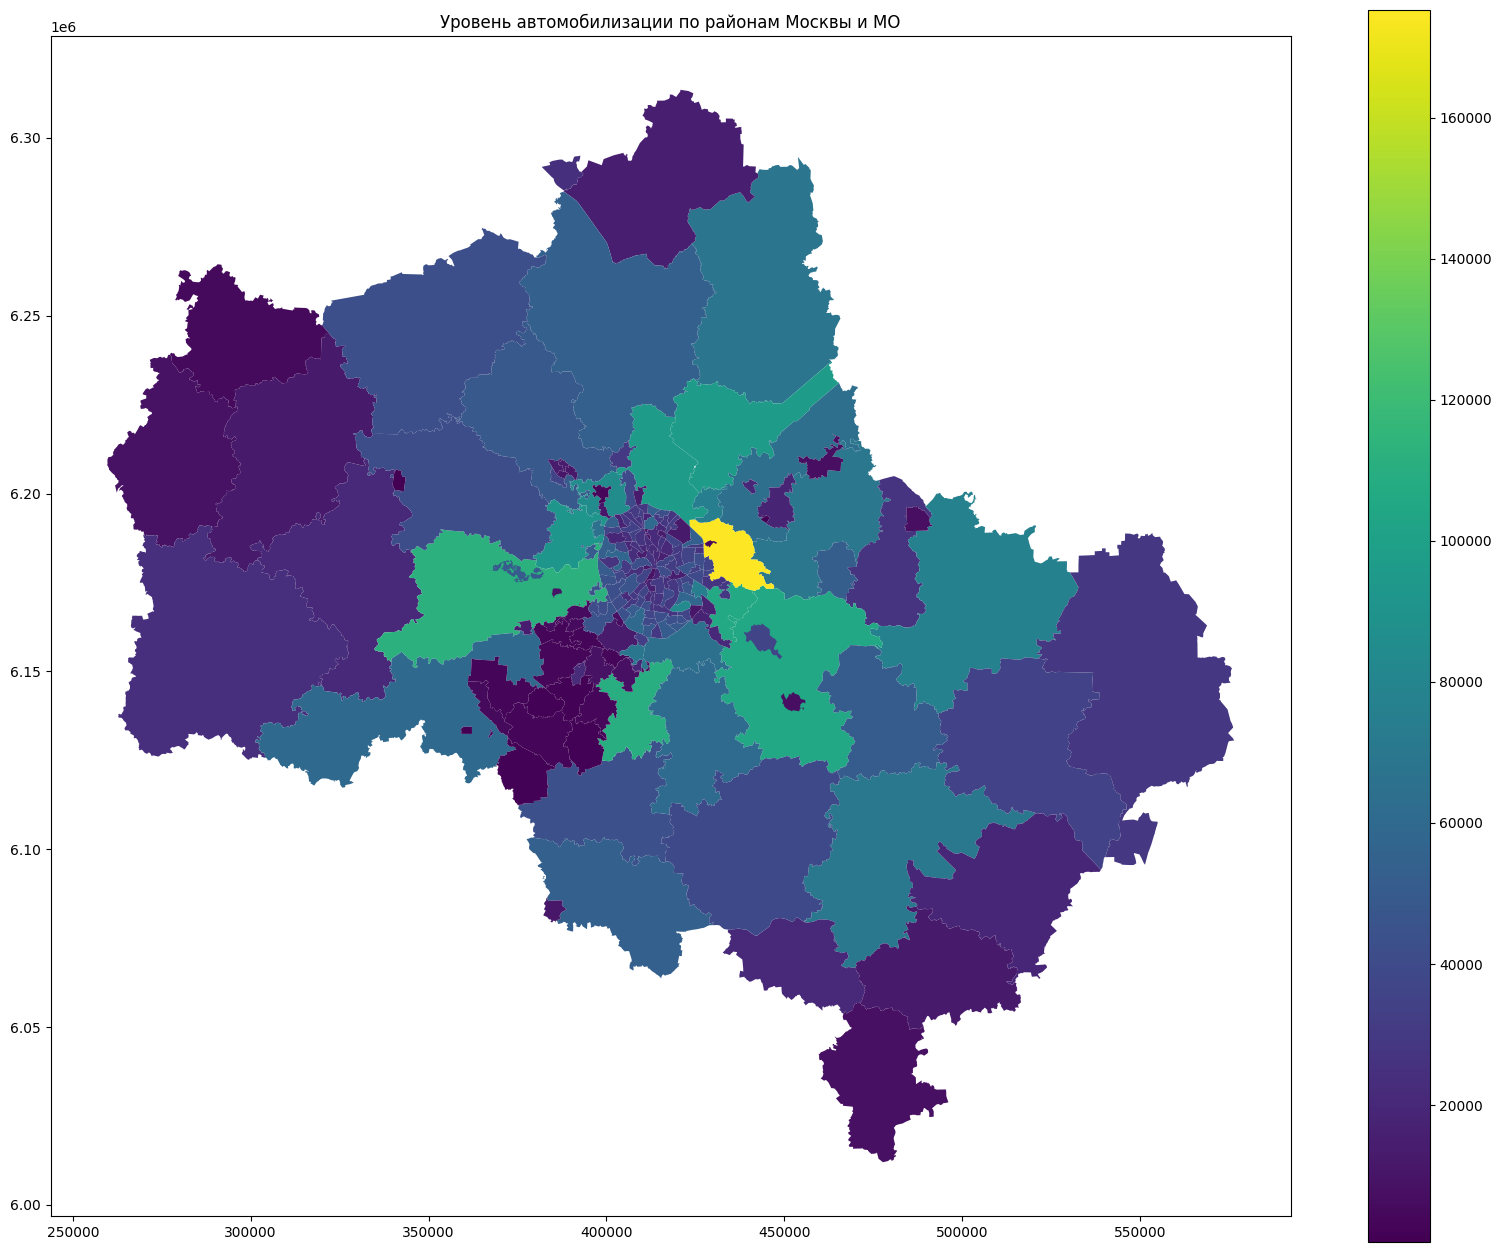

In [131]:
ax = geo_df.plot(column='level_auto', figsize=(20,16),legend=True);
plt.title('Уровень автомобилизации по районам Москвы и МО');

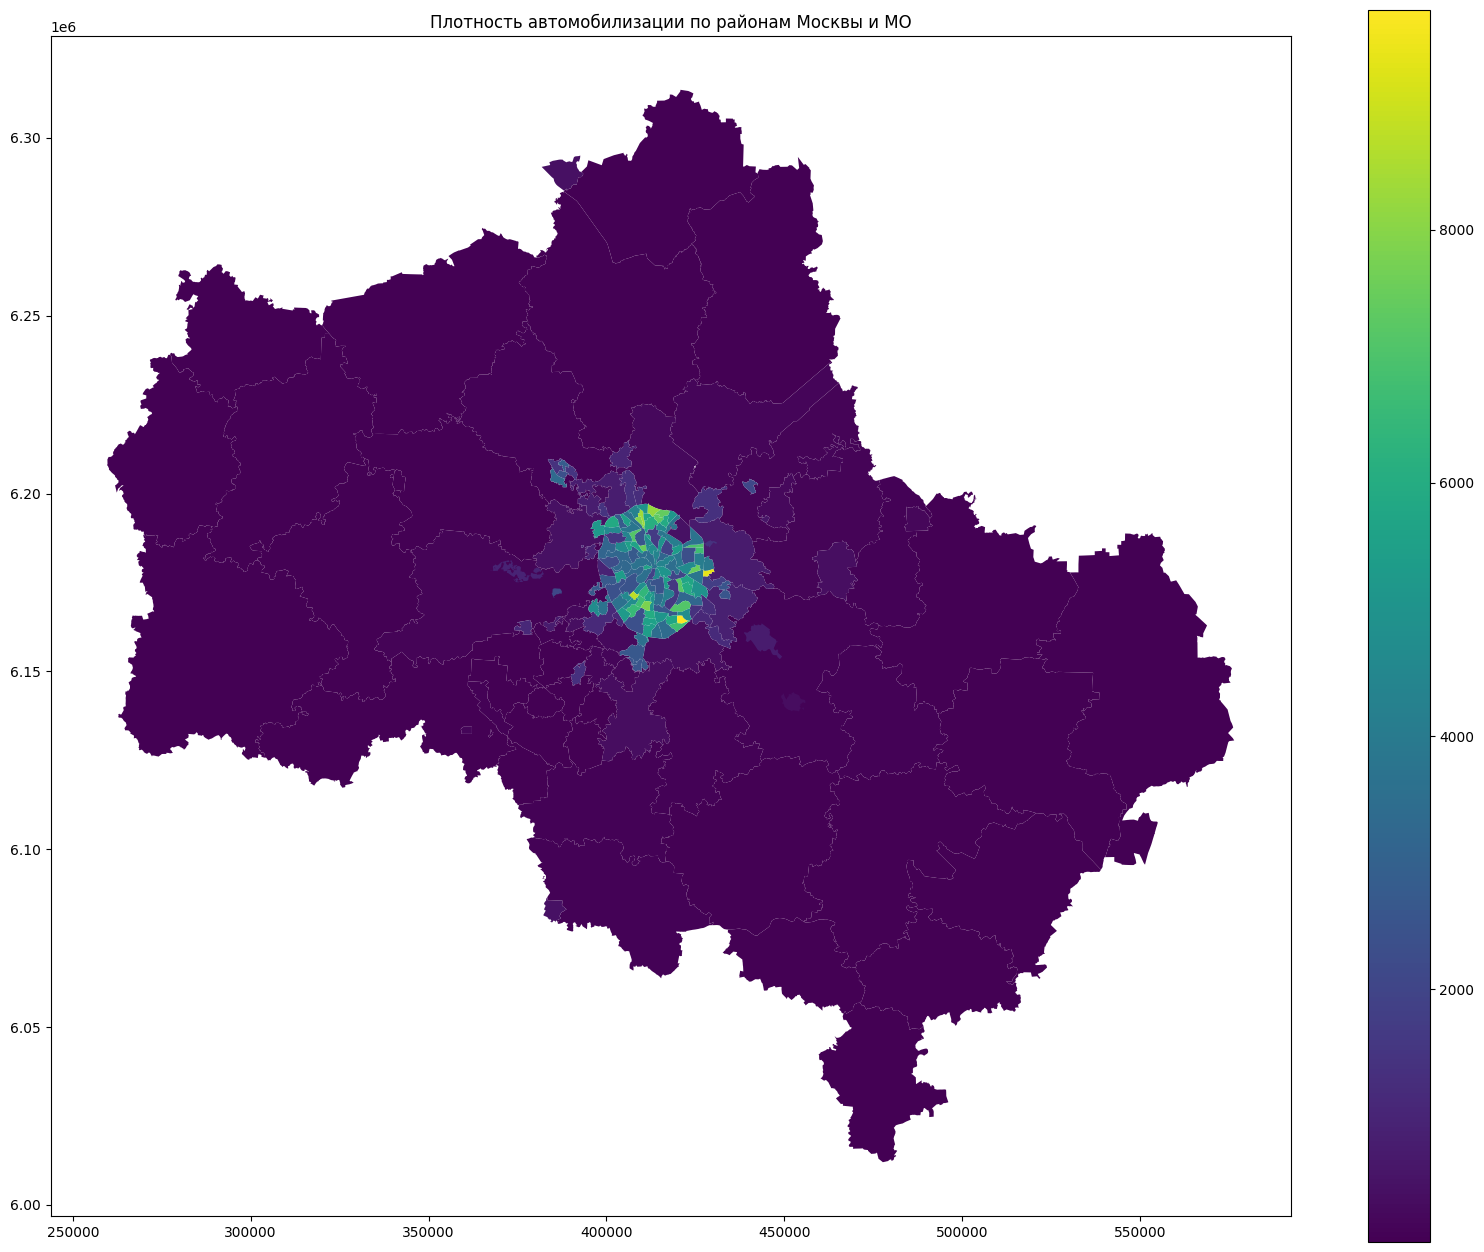

In [132]:
ax = geo_df.plot(column='densty_auto', figsize=(20,16),legend=True);
plt.title('Плотность автомобилизации по районам Москвы и МО');

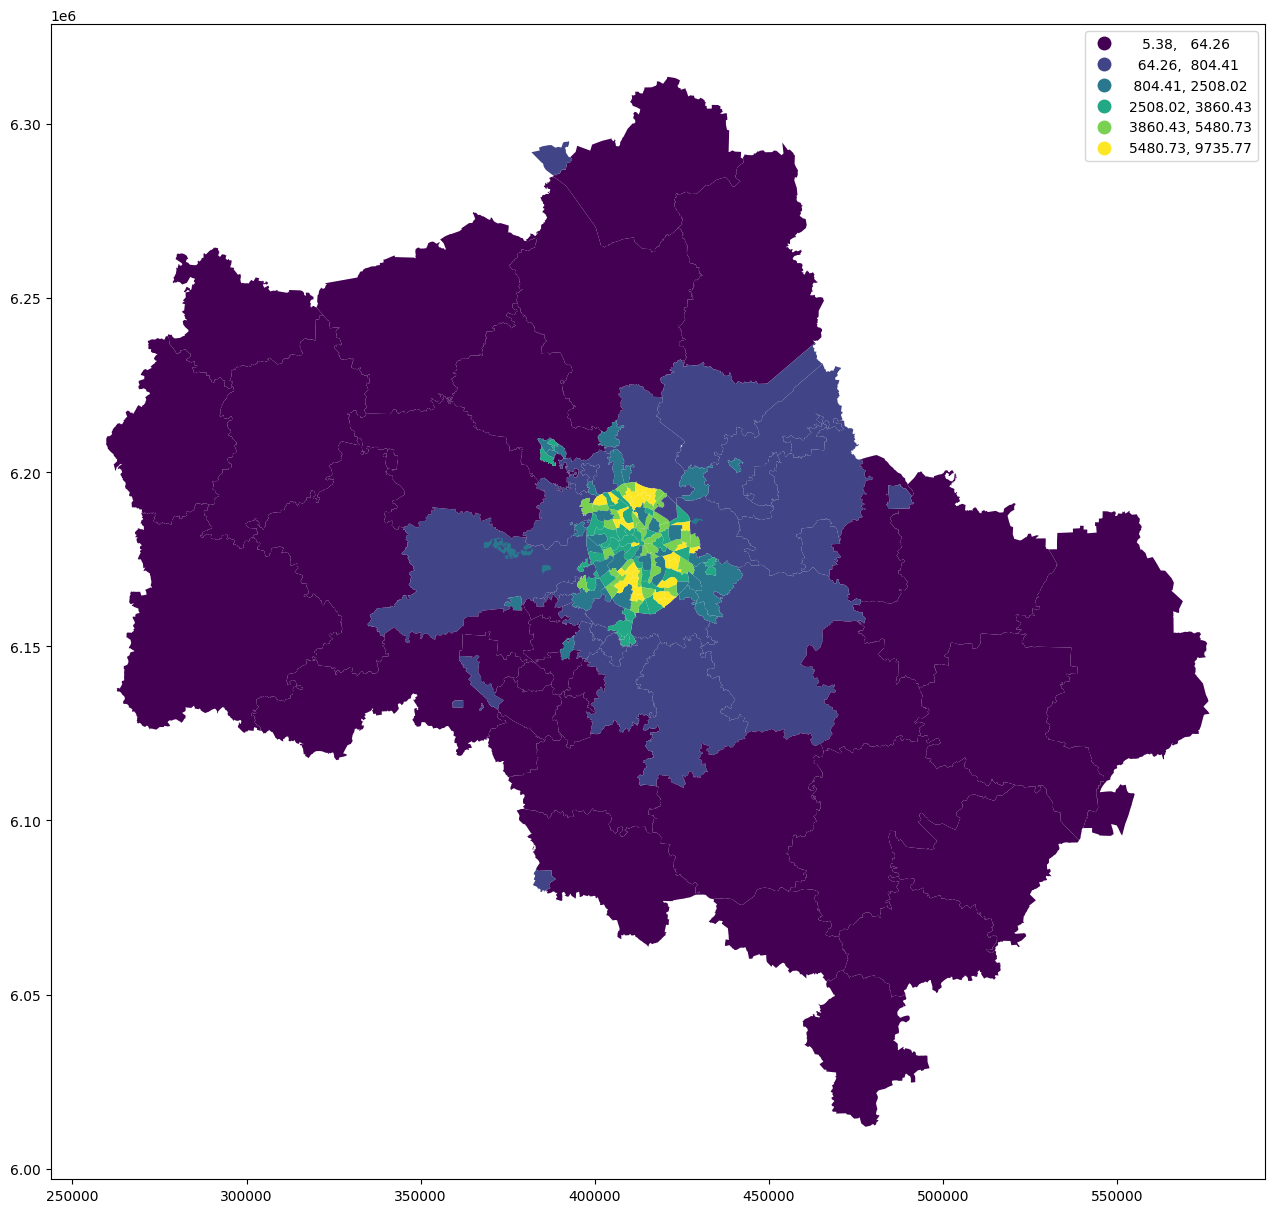

In [133]:
f,ax = plt.subplots(1,1, figsize =(20,15))

#column - имя колонки значения которой используются для цветовой палитры
#legend - True/False - отображать, не отображать легенду
#scheme - тип деления на интервалы, если не указано, то непрерывная шкала. Только для choropleth. Подробнее про типы интервалов в ноутбуке "Choropleth детально"
# k - кол-во интервалов в схеме

geo_df.plot(column='densty_auto' ,legend=True, scheme='quantiles', ax=ax, k=6);

3. Агрегация данных с помощью тесселяции ( использование сетки) 

Тесселяция в данной задаче - это возможность стандартизировать показатель


In [153]:
from libpysal import weights

In [154]:
mx_queen = weights.contiguity.Queen.from_dataframe(geo_df)
mx_rook = weights.contiguity.Rook.from_dataframe(geo_df)

/home/geonode/anaconda3/envs/python-gis/lib/python3.10/site-packages/libpysal/weights/_contW_lists.py:23: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if shape.type.lower() == "polygon":
/home/geonode/anaconda3/envs/python-gis/lib/python3.10/site-packages/libpysal/weights/_contW_lists.py:26: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif shape.type.lower() == "linestring":
/home/geonode/anaconda3/envs/python-gis/lib/python3.10/site-packages/libpysal/weights/_contW_lists.py:28: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif shape.type.lower() == "multilinestring":
/home/geonode/anaconda3/envs/python-gis/lib/python3.10/site-packages/libpysal/weights/_contW_lists.py:30: ShapelyDepre

/tmp/ipykernel_1066760/3572044371.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(mx_queen.cardinalities.values()), ax=ax);
/tmp/ipykernel_1066760/3572044371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(mx_rook.cardinalities.values()), ax=ax, color='orange');


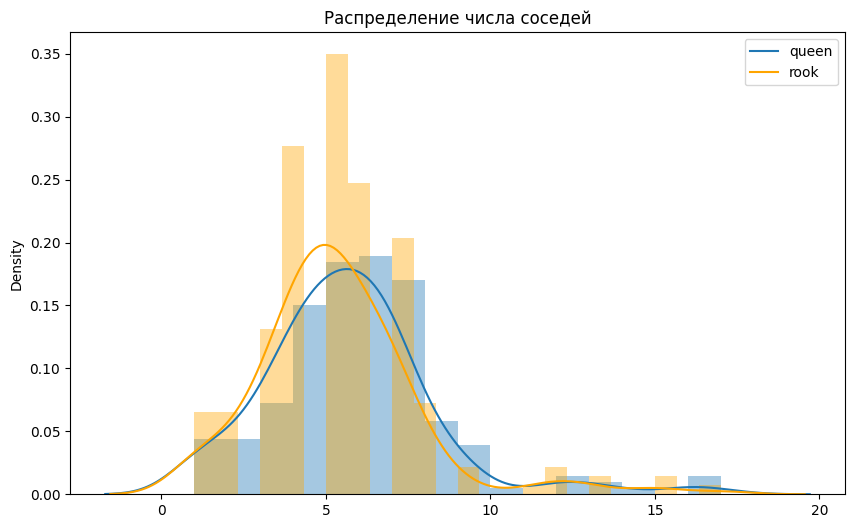

In [157]:
fig, ax=plt.subplots(1,1,figsize=(10,6));
sns.distplot(list(mx_queen.cardinalities.values()), ax=ax);
sns.distplot(list(mx_rook.cardinalities.values()), ax=ax, color='orange');
ax.legend(['queen','rook'])
plt.title("Распределение числа соседей");

In [159]:
# Создание весов (например, для Queen)
mx_queen = weights.Queen.from_dataframe(geo_df)

/home/geonode/anaconda3/envs/python-gis/lib/python3.10/site-packages/libpysal/weights/_contW_lists.py:23: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if shape.type.lower() == "polygon":
/home/geonode/anaconda3/envs/python-gis/lib/python3.10/site-packages/libpysal/weights/_contW_lists.py:26: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif shape.type.lower() == "linestring":
/home/geonode/anaconda3/envs/python-gis/lib/python3.10/site-packages/libpysal/weights/_contW_lists.py:28: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif shape.type.lower() == "multilinestring":
/home/geonode/anaconda3/envs/python-gis/lib/python3.10/site-packages/libpysal/weights/_contW_lists.py:30: ShapelyDepre

Индекс Морана: 0.6227313234653364
p-значение: 0.001


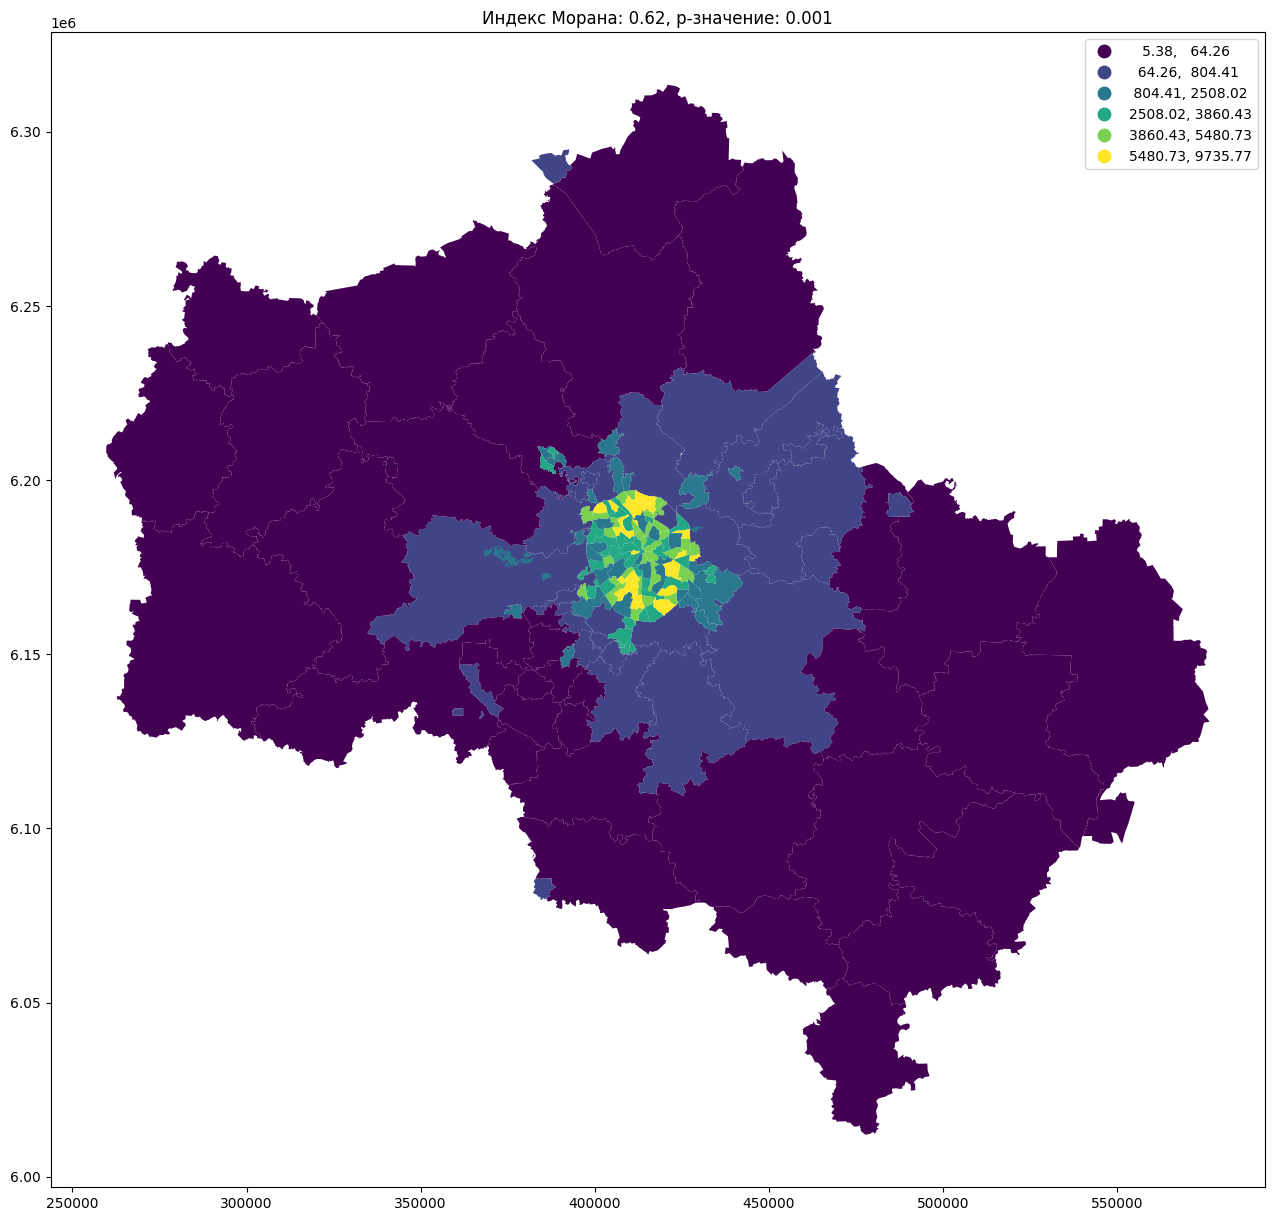

In [163]:
# Вычисление весов для пространственного анализа
w = weights.Queen.from_dataframe(geo_df)  # Используем весовую матрицу "Queen"

# Вычисление индекса Морана
morans_i = esda.Moran(geo_df['densty_auto'], w)

# Печать результатов индекса Морана
print(f'Индекс Морана: {morans_i.I}')
print(f'p-значение: {morans_i.p_sim}')

# Визуализация карты с индексом Морана
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
geo_df.plot(column='densty_auto', legend=True, scheme='quantiles', ax=ax, k=6)

# Добавление текста с индексом Морана на график
ax.set_title(f'Индекс Морана: {morans_i.I:.2f}, p-значение: {morans_i.p_sim:.3f}')
plt.show()

Индекс Морана, равный 0.6227, указывает на положительную пространственную автокорреляцию в ваших данных. Это означает, что высокие значения densty_auto имеют тенденцию группироваться вместе, так же как и низкие значения. 

p-значение 0.001 говорит о том, что результат статистически значим, и вы можете отвергнуть нулевую гипотезу о случайном распределении значений. Это подтверждает, что наблюдаемая пространственная автокорреляция не является случайной.

**Интерпретация результатов:**

1. Положительная автокорреляция: Значения вашего показателя densty_auto имеют тенденцию к пространственной кластеризации. Это может указывать на наличие факторов, которые способствуют этому явлению (например, схожесть в характеристиках соседних участков).

2. Статистическая значимость: Низкое p-значение (менее 0.05) указывает на то, что результаты являются значительными. Это говорит о том, что наблюдаемая автокорреляция не является случайной.

Индекс Морана: 0.6227313234653364
p-значение: 0.001


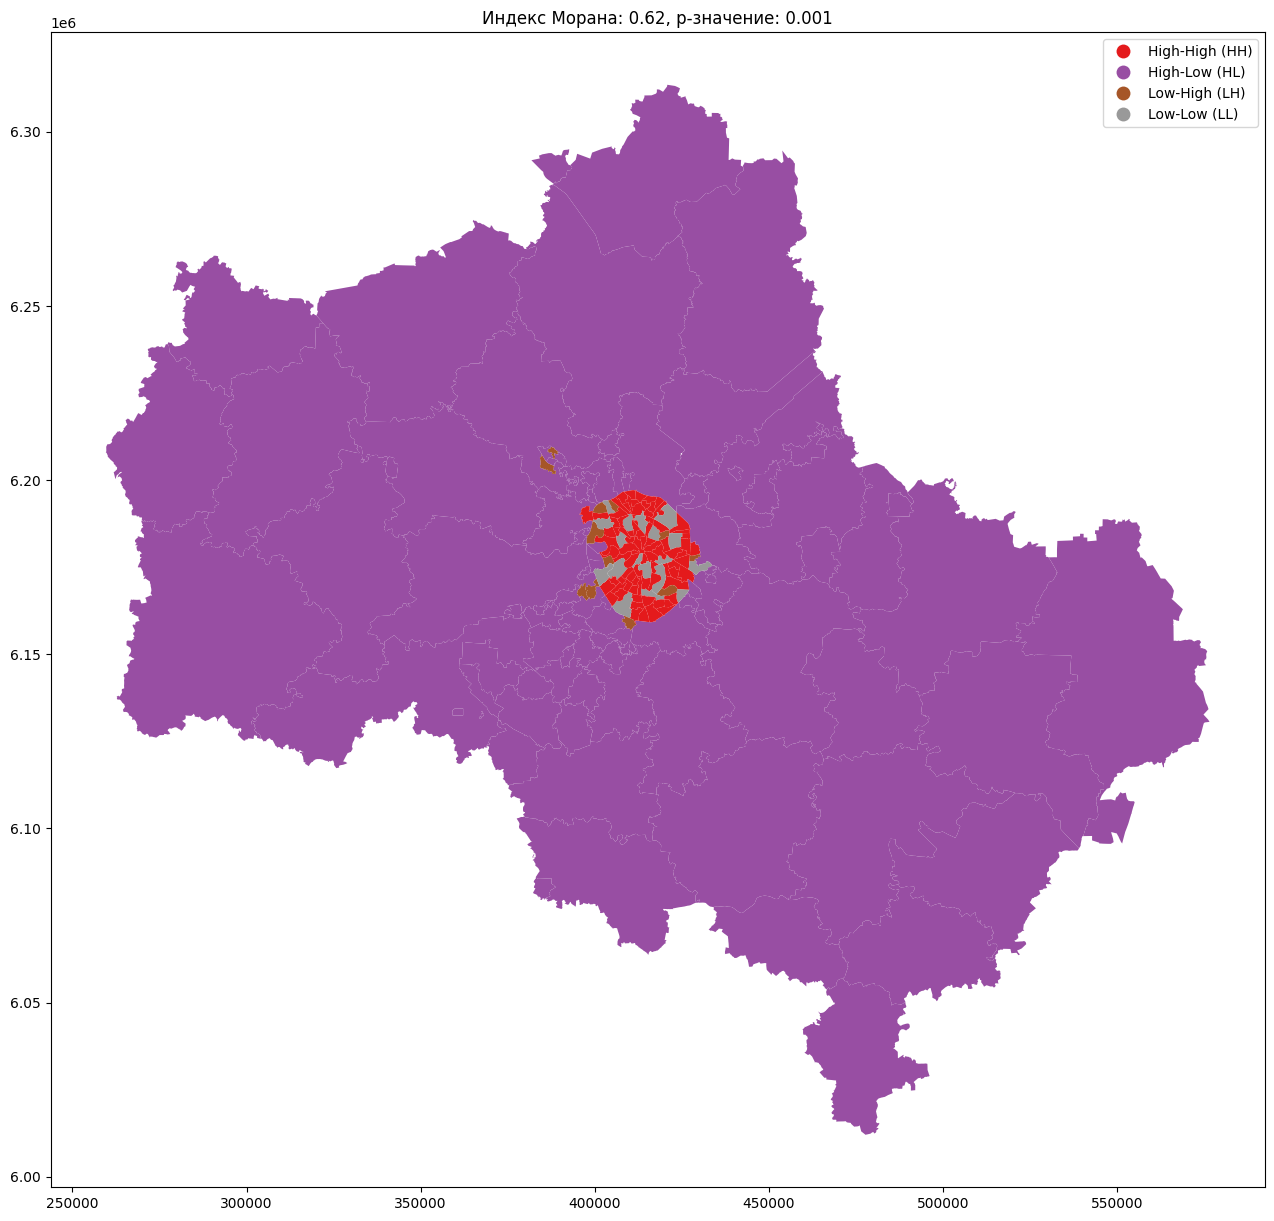

In [164]:
# Вычисление весов для пространственного анализа
w = weights.Queen.from_dataframe(geo_df)  # Используем весовую матрицу "Queen"

# Вычисление индекса Морана
morans_i = esda.Moran(geo_df['densty_auto'], w)

# Печать результатов индекса Морана
print(f'Индекс Морана: {morans_i.I}')
print(f'p-значение: {morans_i.p_sim}')

# Вычисление локального индекса Морана
local_moran = esda.Moran_Local(geo_df['densty_auto'], w)

# Добавление локального индекса Морана в GeoDataFrame
geo_df['local_moran'] = local_moran.Is

# Определение кластеров по локальному индексу Морана
# 1 - высокие значения (HH), 2 - низкие значения (LL), 3 - высокие окружения (HL), 4 - низкие окружения (LH)
geo_df['cluster'] = 'No Cluster'
geo_df.loc[local_moran.q == 1, 'cluster'] = 'High-High (HH)'
geo_df.loc[local_moran.q == 2, 'cluster'] = 'Low-Low (LL)'
geo_df.loc[local_moran.q == 3, 'cluster'] = 'High-Low (HL)'
geo_df.loc[local_moran.q == 4, 'cluster'] = 'Low-High (LH)'

# Визуализация карты с индексом Морана и кластерами
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
color_map = {'High-High (HH)': 'red', 'Low-Low (LL)': 'blue', 
             'High-Low (HL)': 'orange', 'Low-High (LH)': 'yellow', 
             'No Cluster': 'lightgrey'}

geo_df.plot(column='cluster', cmap='Set1', legend=True, ax=ax)

# Добавление текста с индексом Морана на график
ax.set_title(f'Индекс Морана: {morans_i.I:.2f}, p-значение: {morans_i.p_sim:.3f}')
plt.show()


• Локальный индекс Морана: Мы вычисляем локальный индекс Морана с помощью Moran_Local, который позволяет определить, какие участки являются кластерами высоких и низких значений.

• Классификация кластеров: Мы добавляем новую колонку cluster в GeoDataFrame, чтобы классифицировать участки по типам кластеров (HH, LL, HL, LH).

• Визуализация кластеров: На карте цветом выделяются различные типы кластеров, что позволяет легко увидеть области с высокой и низкой плотностью значений.

Индекс Морана: 0.565912193707447
p-значение: 0.001


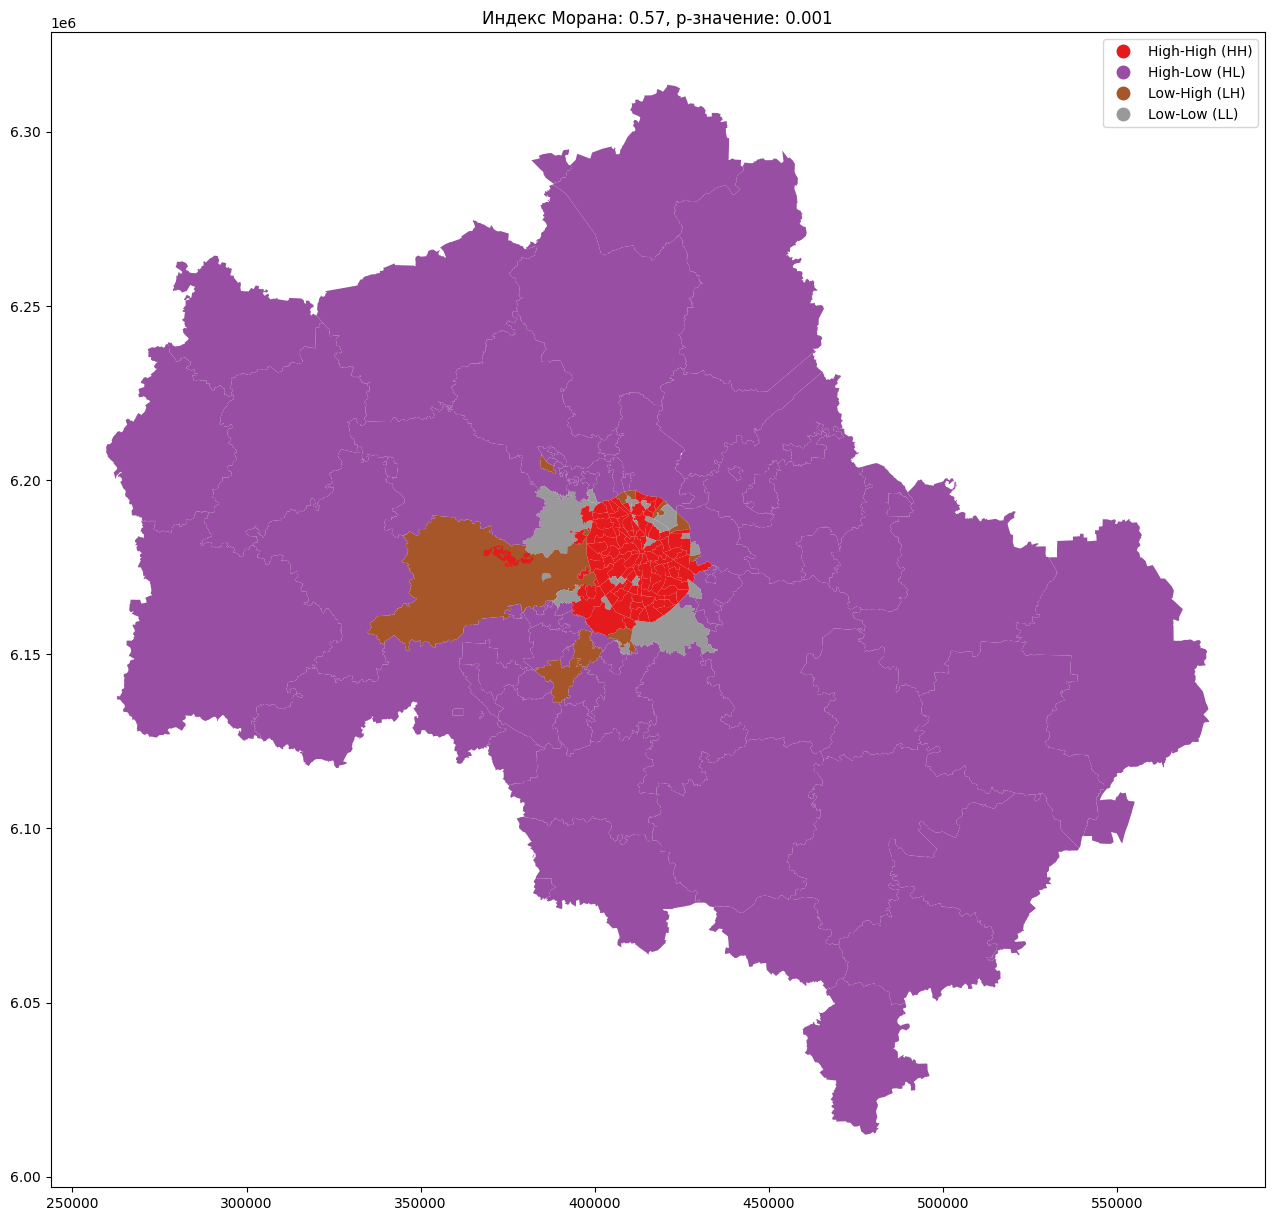

In [174]:
# Вычисление индекса Морана
morans_i = esda.Moran(geo_df['car_accidents_moscow'], w)

# Печать результатов индекса Морана
print(f'Индекс Морана: {morans_i.I}')
print(f'p-значение: {morans_i.p_sim}')

# Вычисление локального индекса Морана
local_moran = esda.Moran_Local(geo_df['car_accidents_moscow'], w)

# Добавление локального индекса Морана в GeoDataFrame
geo_df['local_moran'] = local_moran.Is

# Определение кластеров по локальному индексу Морана
# 1 - высокие значения (HH), 2 - низкие значения (LL), 3 - высокие окружения (HL), 4 - низкие окружения (LH)
geo_df['cluster'] = 'No Cluster'
geo_df.loc[local_moran.q == 1, 'cluster'] = 'High-High (HH)'
geo_df.loc[local_moran.q == 2, 'cluster'] = 'Low-Low (LL)'
geo_df.loc[local_moran.q == 3, 'cluster'] = 'High-Low (HL)'
geo_df.loc[local_moran.q == 4, 'cluster'] = 'Low-High (LH)'

# Визуализация карты с индексом Морана и кластерами
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
color_map = {'High-High (HH)': 'red', 'Low-Low (LL)': 'blue', 
             'High-Low (HL)': 'orange', 'Low-High (LH)': 'yellow', 
             'No Cluster': 'lightgrey'}

geo_df.plot(column='cluster', cmap='Set1', legend=True, ax=ax)

# Добавление текста с индексом Морана на график
ax.set_title(f'Индекс Морана: {morans_i.I:.2f}, p-значение: {morans_i.p_sim:.3f}')
plt.show()

Индекс Морана: 0.41118488694339445
p-значение: 0.001


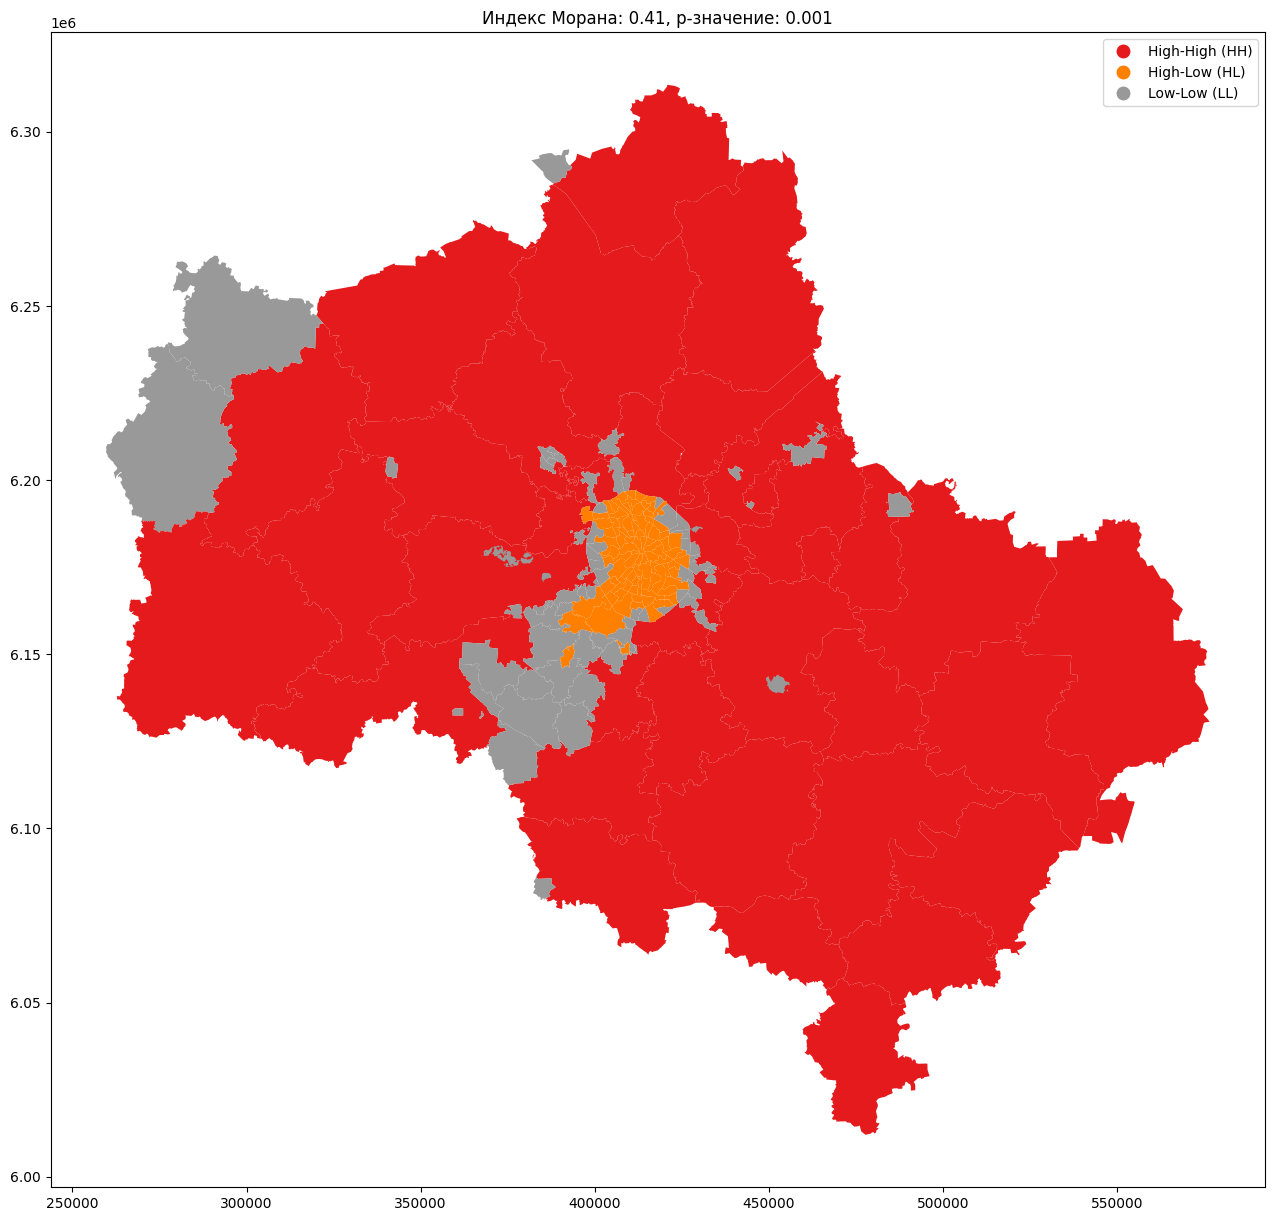

In [175]:
# Вычисление индекса Морана
morans_i = esda.Moran(geo_df['car_accidents_mo'], w)

# Печать результатов индекса Морана
print(f'Индекс Морана: {morans_i.I}')
print(f'p-значение: {morans_i.p_sim}')

# Вычисление локального индекса Морана
local_moran = esda.Moran_Local(geo_df['car_accidents_mo'], w)

# Добавление локального индекса Морана в GeoDataFrame
geo_df['local_moran'] = local_moran.Is

# Определение кластеров по локальному индексу Морана
# 1 - высокие значения (HH), 2 - низкие значения (LL), 3 - высокие окружения (HL), 4 - низкие окружения (LH)
geo_df['cluster'] = 'No Cluster'
geo_df.loc[local_moran.q == 1, 'cluster'] = 'High-High (HH)'
geo_df.loc[local_moran.q == 2, 'cluster'] = 'Low-Low (LL)'
geo_df.loc[local_moran.q == 3, 'cluster'] = 'High-Low (HL)'
geo_df.loc[local_moran.q == 4, 'cluster'] = 'Low-High (LH)'

# Визуализация карты с индексом Морана и кластерами
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
color_map = {'High-High (HH)': 'red', 'Low-Low (LL)': 'blue', 
             'High-Low (HL)': 'orange', 'Low-High (LH)': 'yellow', 
             'No Cluster': 'lightgrey'}

geo_df.plot(column='cluster', cmap='Set1', legend=True, ax=ax)

# Добавление текста с индексом Морана на график
ax.set_title(f'Индекс Морана: {morans_i.I:.2f}, p-значение: {morans_i.p_sim:.3f}')
plt.show()

Индекс Морана: 0.025784012901094208
p-значение: 0.196


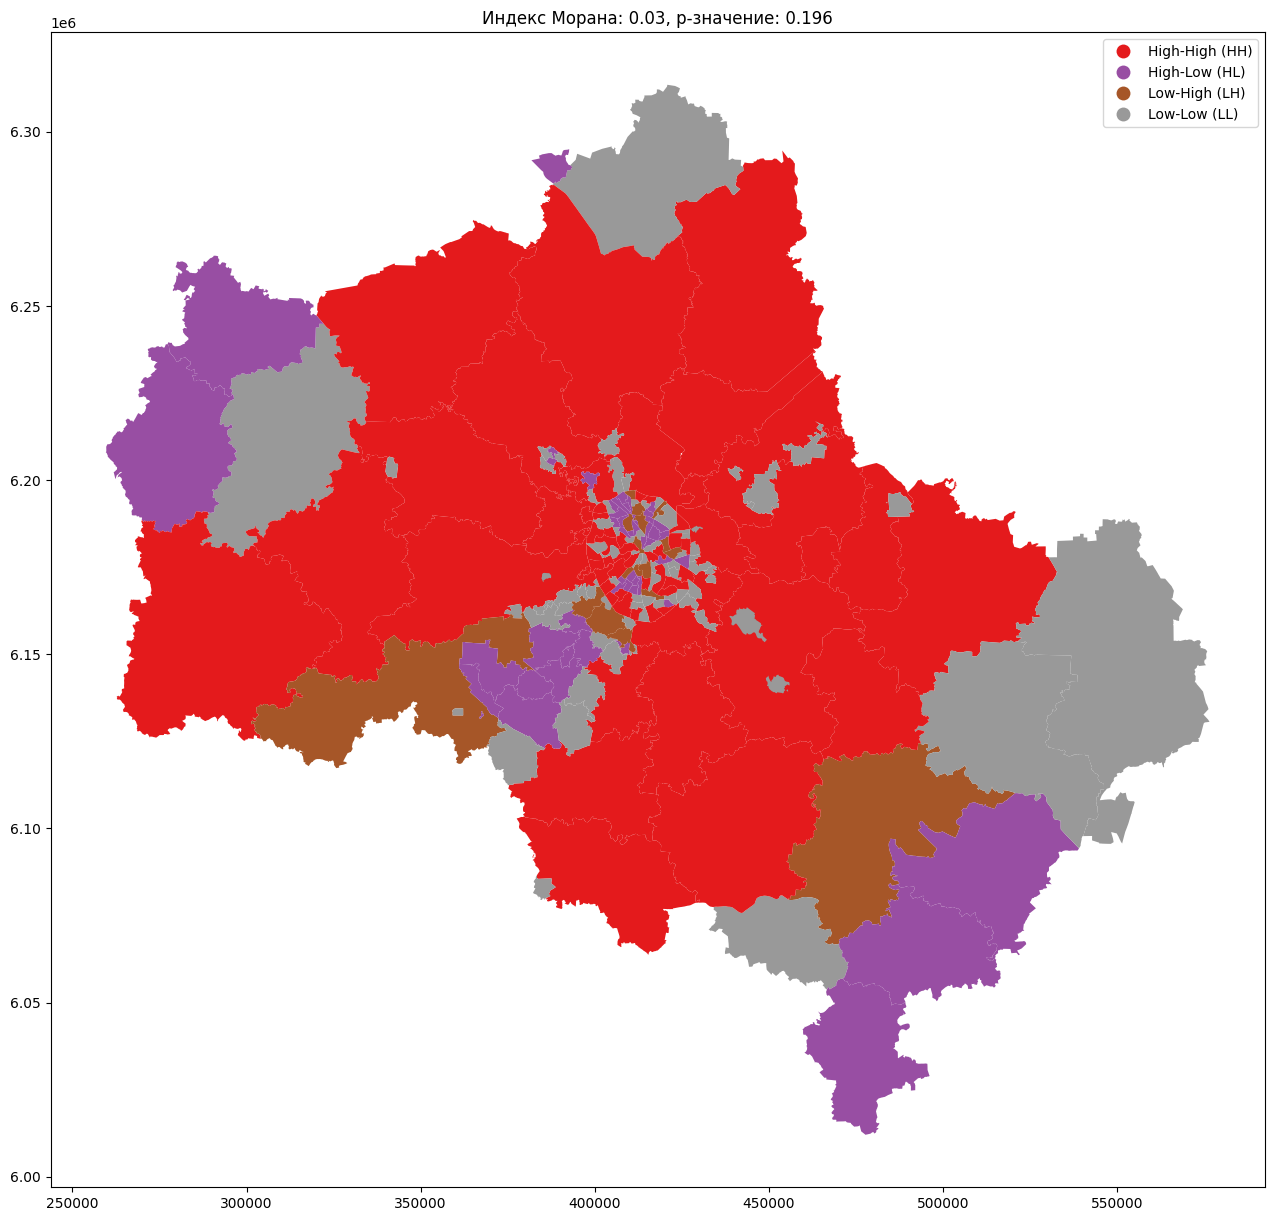

In [176]:
# Вычисление индекса Морана
morans_i = esda.Moran(geo_df['car_accidents_mo']+geo_df['car_accidents_moscow'], w)

# Печать результатов индекса Морана
print(f'Индекс Морана: {morans_i.I}')
print(f'p-значение: {morans_i.p_sim}')

# Вычисление локального индекса Морана
local_moran = esda.Moran_Local(geo_df['car_accidents_mo']+geo_df['car_accidents_moscow'], w)

# Добавление локального индекса Морана в GeoDataFrame
geo_df['local_moran'] = local_moran.Is

# Определение кластеров по локальному индексу Морана
# 1 - высокие значения (HH), 2 - низкие значения (LL), 3 - высокие окружения (HL), 4 - низкие окружения (LH)
geo_df['cluster'] = 'No Cluster'
geo_df.loc[local_moran.q == 1, 'cluster'] = 'High-High (HH)'
geo_df.loc[local_moran.q == 2, 'cluster'] = 'Low-Low (LL)'
geo_df.loc[local_moran.q == 3, 'cluster'] = 'High-Low (HL)'
geo_df.loc[local_moran.q == 4, 'cluster'] = 'Low-High (LH)'

# Визуализация карты с индексом Морана и кластерами
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
color_map = {'High-High (HH)': 'red', 'Low-Low (LL)': 'blue', 
             'High-Low (HL)': 'orange', 'Low-High (LH)': 'yellow', 
             'No Cluster': 'lightgrey'}

geo_df.plot(column='cluster', cmap='Set1', legend=True, ax=ax)

# Добавление текста с индексом Морана на график
ax.set_title(f'Индекс Морана: {morans_i.I:.2f}, p-значение: {morans_i.p_sim:.3f}')
plt.show()

1. Индекс Морана (I):

   • Значение индекса Морана близкое к нулю (в данном случае 0.0258) указывает на то, что наблюдается незначительная пространственная автокорреляция в ваших данных. Это значит, что значения в ваших наблюдениях не имеют ярко выраженной пространственной зависимости — высокие и низкие значения распределены более случайно, чем в случае, если бы они образовывали кластеры.

2. p-значение:

   • p-значение 0.196 говорит о том, что результат не является статистически значимым на уровне значимости 0.05 (или 5%). Это означает, что вы не можете отвергнуть нулевую гипотезу о том, что нет пространственной автокорреляции в ваших данных. В общем, это подтверждает вывод, сделанный на основе индекса Морана: нет убедительных доказательств наличия кластеров высоких или низких значений.

In [177]:
geo_df.to_file("package.gpkg", driver="GPKG")